# Libraries

In [3]:
import numpy as np
import sympy as sp
import sympy.physics.quantum as sq
import sympy.physics.quantum.qubit as sqq
import sympy.physics.quantum.gate as sqg

import matplotlib.pyplot as plt
import networkx as nx

## Extending the braket library to include orthogonality

In [4]:
class onStruct:
    G = nx.Graph()

class onKet(sq.Ket,onStruct):
    def _eval_innerproduct(self,bra,**hints):
        #Check if the innerproduct is with yourself, then set 1
        if sq.Dagger(bra) == self:
            return sp.Integer(1)
        #Else, if the innerproduct is with a neighbor from the graph, set 0
        elif sq.Dagger(bra) in G[self]:
            return sp.Integer(0)
        #Else, do nothing; not enough information
    
    @classmethod
    def set_on_rel(cls,givenG):
        cls.G=givenG
    
    @classmethod
    def dual_class(self):
        return onBra

    
class onBra(sq.Bra,onStruct):
    @classmethod
    def dual_class(self):
        return onKet

In [151]:
class bKet(sq.Ket):
    
    totalKets=0
    
    # @classmethod
    # def _eval_args(cls,args):
    #     #sq.Ket.__init__(s,**args)
    #     #increase total number of kets
    #     #if int(args[0]) > cls.totalKets:
    #         #cls.totalKets+=1
    #         #args[0]=cls.totalKets
    #     # s.totalKets=1
    #     # args=tuple([s.totalKets])
    #     #s.__class__.totalKets+=1        
    #     #s.uLabel=s.__class__.totalKets
    #     #give a unique id to the ket? Use this for the representation
    #     #print(args)
    #     return args

    def _represent_me(s,**options): #_represent_default_basis
        a=np.zeros(s.__class__.totalKets)
        a[s.label[0]]=1
        print(np.Matrix([0,1]))
        return np.Matrix([0,1])
    
    @classmethod
    def set_dimension(cls,arg):
        cls.totalKets=arg
    
    def _eval_innerproduct(self,bra,**hints):
        #Check if the innerproduct is with yourself, then set 1
        if sq.Dagger(bra) == self:
            return sp.Integer(1)
        #Else, if the innerproduct is with a neighbor from the graph, set 0
        else:
            return sp.Integer(0)
        #Else, do nothing; not enough information
    

    @classmethod
    def dual_class(self):
        return bBra

    
class bBra(sq.Bra):
    # @classmethod
    # def _eval_args(cls,args):
    #     return args
    
    @classmethod
    def dual_class(cls):
        return bKet

In [153]:
a=bKet(5);
b=a*sq.Dagger(a);b

sq.represent(a)

TypeError: issubclass() arg 1 must be a class

# Swap KCBS | Playfield 

## Inputs

In [1]:
class inputs:
    graphSize = 5
    p = 1/np.sqrt(5)*np.array([1,1,1,1,1])

## The Sympy Part | playground

In [25]:
k0 = sq.Ket('φ')
k1 = sq.Ket('ψ')
superposition = k0+k1; superposition

|φ> + |ψ>

In [26]:
inner_prod = sq.Dagger(superposition)*superposition; inner_prod

(<φ| + <ψ|)*(|φ> + |ψ>)

In [27]:
sq.qapply(inner_prod)

<φ|φ> + <φ|ψ> + <ψ|φ> + <ψ|ψ>

In [28]:
density = sq.qapply(superposition*sq.Dagger(superposition)); density

|φ>*<φ| + |φ>*<ψ| + |ψ>*<φ| + |ψ>*<ψ|

In [31]:
qubit_state = sqq.Qubit('00'); qubit_state

|00>

In [33]:
isinstance(qubit_state,sq.State)

True

In [37]:
gate_operator = sqg.HadamardGate(0); gate_operator

H(0)

In [38]:
isinstance(gate_operator,sq.Operator)

True

In [3]:

a=sqq.Qubit(0)
b=sqq.Qubit(1)

d = sq.qapply(sq.Dagger(a)*b).doit(); d

0

### Playing with classes

In [50]:
class A:
    gla=1

class B:
    glaba=3
    
class C(B,A):
    glow=4

c=C()

print(isinstance(c,A),isinstance(c,B),isinstance(c,C))


True True True


### Kishor meets the class

In [12]:
class Person:
    name="blank"
    
    def set_name(self,arg):
        self.name = arg
    
    @property
    def myName(self):
        return self.name

    def get_name(self):
        return self.name
    
Kishor = Person() 
Kishor.set_name("Bharti")

M = Person()
M.set_name("M")



print(M.myName, Kishor.myName, M.get_name() )

print(M.myName,Kishor.myName)

M Bharti M
M Bharti


In [22]:
class Person:
    name="blank"
    compatibility=""
    
    def set_name(self,arg):
        self.name = arg
    
    @property
    def myName(self):
        return self.name
    
    @classmethod
    def set_comp(cls,arg):
        cls.compatibility=arg
        
    @classmethod
    def get_comp(cls):
        return cls.compatibility
        
    @property
    def comp(self):
        return self.compatibility
    
Kishor = Person() 
Kishor.set_name("Bharti")

M = Person()
M.set_name("M")

Person.set_comp("M hates K")
print(Person.get_comp())

print(M.myName,Kishor.myName)

print(M.comp,Kishor.comp)

M hates K
M Bharti
M hates K M hates K


In [28]:
class A:
    aVal="blank"
    
    @property
    def myVal(self):
        return self.aVal

class C:
    cVal="blank3"
    
    @property
    def myVal3(self):
        return self.cVal
    
class B(A,C):
    bVal="blank2"
    
    @property
    def myVal2(self):
        return self.bVal
    
a = B()

print(a.myVal2,a.myVal,a.myVal3)

blank2 blank blank3


### Preliminary implementation of orthogonormal kets (uses labels)

In [190]:
class onKet(sq.Ket):
#     a=1
    
    #@classmethod
    #this @classmethod descriptor was killing it
    #it was sending the class in "self" instead of the instance in "self"
    #makes sense now
    #I can perhaps use this to set orthogonality relations a little more generally
    def _eval_innerproduct(self,bra,**hints):
        #print(self.label,bra.label)
        if self.label == bra.label:
            return sp.Integer(1)
        else:
            return sp.Integer(0)
    
    @classmethod
    def dual_class(self):
        return onBra
    @property
    def iAm(self):
        return self.label
    
class onBra(sq.Bra):
#     a=2

#     @classmethod
#     def _eval_innerproduct(self,ket,**hints):
#         if self.label == ket.label:
#             return sp.Integer(1)
#         else:
#             return sp.Integer(0)
    
    @classmethod
    def dual_class(self):
        return onKet

In [191]:
a=onKet(0)
b=onKet(1)

In [192]:
c=a+b; c

|0> + |1>

In [193]:
sq.qapply(sq.Dagger(b)*a).doit()

0

In [194]:
d=sq.Dagger(c)*b
sq.qapply(d).doit()

1

### Orthogonal Ket, general orthogonality relation

In [31]:
class onStruct:
    G = nx.Graph()

class onKet(sq.Ket,onStruct):
#     a=1
    #@classmethod
    #this @classmethod descriptor was killing it
    #it was sending the class in "self" instead of the instance in "self"
    #makes sense now
    #I can perhaps use this to set orthogonality relations a little more generally
    def _eval_innerproduct(self,bra,**hints):
        #print(self.label,bra.label)        
        if sq.Dagger(bra) == self:
        #if self.label == bra.label:
            return sp.Integer(1)
        elif sq.Dagger(bra) in G[self]:
            return sp.Integer(0)
    
    @classmethod
    def set_on_rel(cls,givenG):
        cls.G=givenG
    
    @classmethod
    def dual_class(self):
        return onBra

    
class onBra(sq.Bra,onStruct):
#     a=2

#     @classmethod
#     def _eval_innerproduct(self,ket,**hints):
#         if self.label == ket.label:
#             return sp.Integer(1)
#         else:
#             return sp.Integer(0)    
    @classmethod
    def dual_class(self):
        return onKet

In [32]:
#define the kets
a=onKet(1)
b=onKet(2)
c=onKet(3)
d=onKet(4)

#define the orthogonality relation using a graph (edges mean orthogonal)
G = nx.Graph()
G.add_nodes_from([a,b,c,d])
G.add_edges_from([[a,b],[b,c],[c,d],[d,a]])

#Add this graph to the class
onKet.set_on_rel(G)

#test
s1 = (a+b+c)/sp.sqrt(3)
s2 = (b+c+d)/sp.sqrt(3)

d = sq.Dagger(s1)*s2

#simplify
sq.qapply(d).doit()

<1|3>/3 + <2|4>/3 + 2/3

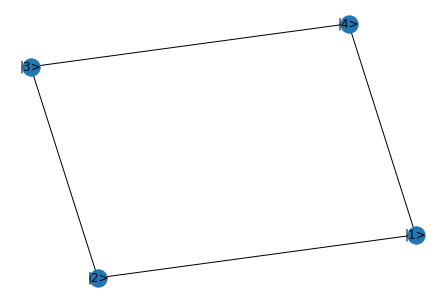

In [35]:
#plot the graph for fun
nx.draw(G, with_labels=True)

In [44]:
f=sq.Ket("f")
g=sq.Ket("g")
h=sq.TensorProduct(a,b)
l=sq.TensorProduct(b,a)
sq.qapply(sq.Dagger(h)*l).doit()

0

### Playing with networks

In [197]:
G = nx.Graph()
G.add_node(1)

In [201]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([[1,2],[2,3],[3,4],[4,5],[5,1]])

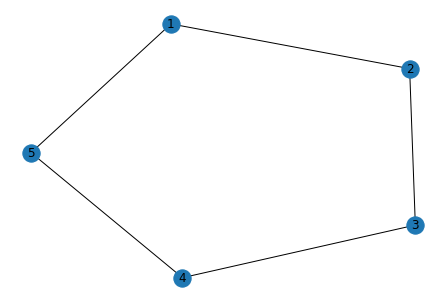

In [205]:
%matplotlib inline 
nx.draw(G, with_labels=True)

In [212]:
3 in G[1]

False

# Ideal KCBS calculations

In [125]:
class cls_iKCBS:    
    
    def __init__(s,n):
        cls_iKCBS.n=n
        #j in 0,1,2,3,4
        s.ke = [bKet(j) for j in range(3)]    
        s.br = [sq.Dagger(s.ke[j]) for j in range(3)]
        s.πs = []
        for j in range(5):
            s.πs.append(s.proj(j,n))            
        s.opT = s.ke[0]*s.br[2] + s.ke[1]*s.br[0] + s.ke[2]*s.br[1]
    
    def proj(self,j,n):
        N=sp.Integer(n)
        J=sp.Integer(j)
        #print(N,j)
        one=sp.Integer(1)
        #print(one)
        α1=sp.cos((sp.pi)/N)/(one+sp.cos(sp.pi/N)) #verified
        #a1=sp.cos(sp.pi/N)
        #
        #print(α1)
        
        α2=one-α1 #verified
        α3=J * sp.pi * (N-one)/N #verified
        
        vec = sp.sqrt(α1)*self.ke[0] + sp.sqrt(α2)*sp.sin(α3)*self.ke[1] + sp.sqrt(α2)*sp.cos(α3)*self.ke[2]
        
        projector = vec*sq.Dagger(vec)
        return projector
    
    def find_coeff_opT(s):
        a=sp.symbols('a0:%d'%(cls_iKCBS.n*2))
        LHS=0
        for i in range(cls_iKCBS.n):
        	LHS=LHS+a[i]*s.πs[i]
        
        return LHS
        #print(LHS)
        #for i in range
        

    '''
       def vec(self,j,n):    
           N=sp.Integer(n)
           J=sp.Integer(j)
           #print(N,j)
           one=sp.Integer(1)
           #print(one)
           α1=sp.cos((sp.pi)/N)/(one+sp.cos(sp.pi/N)) #verified
           #a1=sp.cos(sp.pi/N)
           #
           #print(α1)
        
           α2=one-α1 #verified
           α3=J * sp.pi * (N-one)/N #verified
        
           vec = sp.sqrt(α1)*self.k0 + sp.sqrt(α2)*sp.sin(α3)*self.k1 + sp.sqrt(α2)*sp.cos(α3)*self.k2
        
           #projector = vec*sq.Dagger(vec)
           return vec
    '''

In [128]:

iKCBS=cls_iKCBS(5)
#to access the vectors 

#uncomment to test
sq.represent(sq.qapply(iKCBS.πs[0]*iKCBS.πs[1]))
#iKCBS.πs[1]


TypeError: _represent() got an unexpected keyword argument 'index'

In [26]:
iKCBS.find_coeff_opT()

a0*(sqrt(1/4 + sqrt(5)/4)*|0>/sqrt(sqrt(5)/4 + 5/4) + sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*|2>)*(sqrt(1/4 + sqrt(5)/4)*<0|/sqrt(sqrt(5)/4 + 5/4) + sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*<2|) + a1*(sqrt(1/4 + sqrt(5)/4)*|0>/sqrt(sqrt(5)/4 + 5/4) + sqrt(5/8 - sqrt(5)/8)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*|1> + (-sqrt(5)/4 - 1/4)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*|2>)*(sqrt(1/4 + sqrt(5)/4)*<0|/sqrt(sqrt(5)/4 + 5/4) + sqrt(5/8 - sqrt(5)/8)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*<1| + (-sqrt(5)/4 - 1/4)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*<2|) + a2*(sqrt(1/4 + sqrt(5)/4)*|0>/sqrt(sqrt(5)/4 + 5/4) - sqrt(sqrt(5)/8 + 5/8)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*|1> + (-1/4 + sqrt(5)/4)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*|2>)*(sqrt(1/4 + sqrt(5)/4)*<0|/sqrt(sqrt(5)/4 + 5/4) - sqrt(sqrt(5)/8 + 5/8)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1)*<1| + (-1/4 + sqrt(5)/4)*sqrt(-(1/4 + sqrt(5)/4)/(sqrt(5)/4 + 5/4) + 1

## Debugging

In [242]:
sq.qapply(sq.Dagger(iKCBS.πs[0])*iKCBS.πs[1]);

#sq.represent(sq.qapply(sq.Dagger(iKCBS.πs[0])*iKCBS.πs[1]),basis=iKCBS.ke)

In [192]:
#older version without lists
class cls_iKCBS:
    k0=bKet(0)    
    k1=bKet(1)
    k2=bKet(2)
    
    b0=sq.Dagger(k0)
    b1=sq.Dagger(k1)
    b2=sq.Dagger(k2)
    
    πs=[]
    
    def __init__(self,n):
        #j in 0,1,2,3,4
        for j in range(5):
            self.πs.append(self.proj(j,n))
    
    def proj(self,j,n):
        N=sp.Integer(n)
        J=sp.Integer(j)
        #print(N,j)
        one=sp.Integer(1)
        #print(one)
        α1=sp.cos((sp.pi)/N)/(one+sp.cos(sp.pi/N)) #verified
        #a1=sp.cos(sp.pi/N)
        #
        #print(α1)
        
        α2=one-α1 #verified
        α3=J * sp.pi * (N-one)/N #verified
        
        vec = sp.sqrt(α1)*self.k0 + sp.sqrt(α2)*sp.sin(α3)*self.k1 + sp.sqrt(α2)*sp.cos(α3)*self.k2
        
        projector = vec*sq.Dagger(vec)
        return projector
    '''
       def vec(self,j,n):    
           N=sp.Integer(n)
           J=sp.Integer(j)
           #print(N,j)
           one=sp.Integer(1)
           #print(one)
           α1=sp.cos((sp.pi)/N)/(one+sp.cos(sp.pi/N)) #verified
           #a1=sp.cos(sp.pi/N)
           #
           #print(α1)
        
           α2=one-α1 #verified
           α3=J * sp.pi * (N-one)/N #verified
        
           vec = sp.sqrt(α1)*self.k0 + sp.sqrt(α2)*sp.sin(α3)*self.k1 + sp.sqrt(α2)*sp.cos(α3)*self.k2
        
           #projector = vec*sq.Dagger(vec)
           return vec
    '''

In [137]:
iKCBS=cls_iKCBS()
sq.qapply(iKCBS.proj(1,5)).doit();

In [154]:
sp.simplify(sq.qapply(sq.Dagger(iKCBS.k0)*iKCBS.proj(1,5)*iKCBS.proj(2,5)*iKCBS.k0).doit())
#sp.N(sq.qapply(sq.Dagger(iKCBS.k0)*iKCBS.proj(1,5)*iKCBS.proj(2,5)*iKCBS.k0).doit())
#sq.qapply(iKCBS.proj(1,5)*iKCBS.proj(2,5)).doit()

(-7*sqrt(25 - 5*sqrt(5))/8 - 15*sqrt(5 - sqrt(5))/8 + sqrt(5*sqrt(5) + 25)/2 + 5*sqrt(sqrt(5) + 5)/4)/(sqrt(sqrt(5) + 5)*(2*sqrt(5) + 5))

In [129]:
(sq.Dagger(iKCBS.k0)*iKCBS.k0).doit()

1

In [145]:
sp.N(sq.qapply(sq.Dagger(iKCBS.vec(1,5))*iKCBS.vec(1,5)).doit(),5000)

1.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [158]:
sp.N(sp.simplify(sq.qapply(sq.Dagger(iKCBS.vec(4,5))*iKCBS.vec(3,5)).doit()))

-0.e-140

In [176]:
sp.N(sq.qapply(sq.Dagger(iKCBS.πs[0])*iKCBS.πs[1]))

-2.77555756156289e-17*|2><0| - 9.71445146547012e-17*|2><1| + 5.55111512312578e-17*|2><2|

## Translation Operator using $\Pi$s

See for the original implementation Self-testing_KCBS_fidelity_bounds

In [12]:

a=sp.symbols('a0:%d'%(cls_iKCBS.n*2))
a[0]
c=0
c=c+a[0]; c

a0

# Working

## Inputs